In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Zero coupon bond
We denote the value of a **zero coupon bond** at time $n$ with maturity $m$ by $B_{n,m}$. We call $B_{m,m}$ the **face value**, which is constant(r.v) since it's predetermined and when at the maturity, the owner will receive this face value .

We define **discounted process** by:(n>1)

$$  D_n = \frac{1}{(1+R_0)\ldots (1+R_{n-1})}
$$

i.e initial capital needed to coumpounded s.t at time $n$ it grows to one dollar. Or we can view it as 'how much is one dollar at time n  worth now'. As we see it is decreasing provided that $R_k >0$.

The idea of bound pricing based on the interest rate. We use risk neutral measure and compute the bond price by:

$$
B_{0,m} \equiv  B_{m,m}\tilde{\mathbb{E}}[D_m]
$$
and
$$
B_{n,m} \equiv   B_{m,m} \tilde{\mathbb{E}}_n[\frac{D_m}{D_n}] = B_{m,m} \tilde{\mathbb{E}}_n[\frac{(1+R_0)\ldots (1+R_{n-1})}{(1+R_0)\ldots (1+R_{m-1})}]
\left(= B_{m,m} \tilde{\mathbb{E}}_n[\frac{1}{(1+R_n)\ldots (1+R_{m-1})}] \qquad \text{for} \; 0 < n < m \right)
$$
i.e condition on $\mathcal{F}_n$, the expetecd value of $B_{m,m}$ discounted to time $n$. By the property of conditional expection, we have

$$ D_n B_{n,m} =  B_{m,m} \tilde{\mathbb{E}}_n[D_m]$$



In [2]:
def D(R_array):
    prod = 1
    disc_process=[]
    for i,r in enumerate(R_array):
        prod = prod/(1+r)
        disc_process.append(prod)
    return disc_process

We define the **yield** to be the average return of holding a bond, that is, the effective interest rate such that the initial value of the bond is compounded to its face value at maturity. In math expression, it writes:
$$
(1+r_y)^m B_{0,m} = B_{m,m} \Rightarrow
r_y = (\frac{B_{m,m}}{B_{0,m}})^{\frac{1}{m}} -1 = \frac{1}{\tilde{\mathbb{E}}[D_m]^{\frac{1}{m}}} -1
$$
The **yield curve** is the function of yield w.r.t maturity, i.e $r_{\text{yield}}(m)$. This should be a sequence of r.vs.

In [15]:
def r_yield(B_ini,B_face,T):
    if T== 0:
        return 0
    else:
        
        return (B_face/B_ini)**(1/T) - 1
def r_yield_curve( ini_value, face_value, maturity):
    tempt = []
    for B_ini, B_face , T in zip(ini_value, face_value, maturity):
        tempt.append(r_yield(B_ini,B_face,T))
    return np.array(tempt)

Consider an agent who can trade one dolalr face value zero coupon bond with every maturity and access the money market. Then his portfolio value $\{X_n\}_{n\geq 0}$ satisfies the following:

$$
X_{n+1} = \underbrace{\Delta_{n,n+1} + \sum_{m=n+2}^N \Delta_{n,m} B_{n+1,m}}_{\text{held bonds value}} + \overbrace{(1+ R_n)\left( X_n - \sum^N_{m=n+1} \Delta_{n,m}B_{n,m} \right)}^{\text{wealth/debt in money market}}
$$

where $\Delta_{n,m} $ is the number of m-maturity zero coupon bonds held by the agent between time $n$ and $n+1$. Note that $X_n$ is the portfolio value right at time $n$(before rebalancing). It can be shown that $\{D_n X_n\}_{n \geq 0}$ is a martingale, which is intuitive since everything is built on interest rate, so after considering
discounting, the expected value of wealth(portfolio value) should be constant. And in particular, the price of zero coupon bond is a martingale:

$$        
  B_{n,m} =  \frac{1}{1+R_n}\tilde{\mathbb{E}}_n[ B_{l,m}]  \qquad \text{for} \; l \geq n
$$

### Yield curve random walk model
Assume the yield follows random walk and compute the corresponding bond price

In [63]:
def walk1(p,step=0.0001):
    alpha = np.random.rand()
    if alpha > p :
        return step
    else :
        return -step
R_arrays = np.zeros((1000,10))
for i in range(R_arrays.shape[0]):
    if i % 100 ==0:
        print(i)
    R = []
    r=0.05
    for j in range(R_arrays.shape[1]):
        R_arrays[i,j] = r
        r +=walk1(0.5,0.05)

0
100
200
300
400
500
600
700
800
900


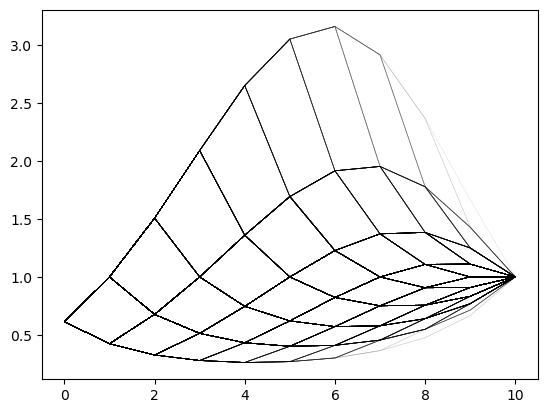

In [64]:
T = R_arrays.shape[1]
for miko in R_arrays:
    B =[]
    for n,r in enumerate(miko):
        B.append( (1+r)**(n-T)  )
    B.append(1)
    plt.plot(B,lw=0.5,c='k',alpha=0.1)


### Interest rate random walk model
If we assume the interest rate follows the geometric random walk with scale $\alpha$


In [4]:
def walk(p,scale=0.01):
    alpha = np.random.rand()
    if alpha > p :
        return 1+scale
    else :
        return 1-scale
def R_process(N,p,r_0,scale=0.01):
    R = [r_0]
    r=r_0
    for i in range(N-1):
        r=r*walk(p,scale)
        R.append(r)
    return R


In [5]:
#for a single interest rate path, compute the prod
def Bond_single_path(r,R):
    R_new=(R*r/R[0]).copy()
    prod = 1
    for rr in R_new:
        prod *= 1/(1+rr)
    return prod
#for several interest rate paths, compute the bond price path by averaging 
def Bond_price(r,R_arrays ):
    B_array = np.zeros(R_arrays.shape[0])
    for i,R in enumerate(R_arrays):
        B_array[i] = Bond_single_path(r,R)
    return np.mean(B_array)

In [6]:
#for several interest rate paths, compute several bond price paths
def Bond_process(r_0,R_arrays):
    B = np.zeros_like(R_arrays)
    for i,R in enumerate(R_arrays):
        for j,r in enumerate(R):
            B[i,j] = Bond_price(r,R_arrays[:,j:])
    B_end = np.ones(R_arrays.shape[0])
    B_end = B_end[:,np.newaxis]
    B= np.concatenate((B,B_end),axis=1)
    return B

In [7]:
times = 1000
R_array = np.zeros((times,10))
for i in range(times):
    R_array[i,:] = R_process(10,0.5,r_0=0.05,scale=0.5)
B= Bond_process(0.05,R_array)


1000 realizations, deeper color means more possible path.

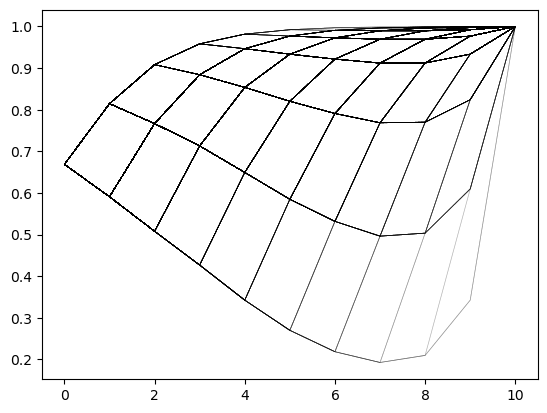

In [8]:
for peko in B:
    plt.plot(peko,lw=0.5,c='k',alpha=0.1)

also plot the yeild curve

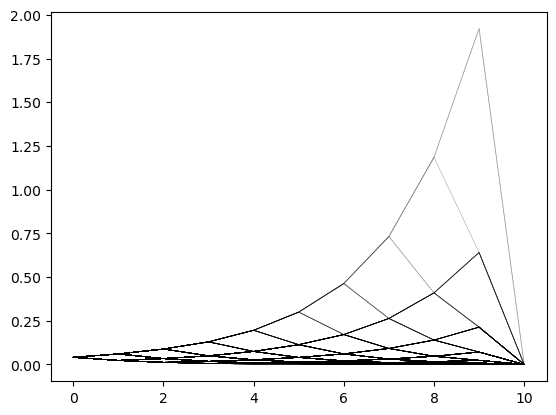

In [16]:
for peko in B:
    yield_curve = [r_yield(ini , 1,10-time) for time,ini in enumerate(peko) ]
    plt.plot(yield_curve,lw=0.5,c='k',alpha=0.1)